## Domain Analysis
The primary objective is to predict the compressive strength of concrete. Compressive strength is a crucial property of concrete, and understanding the factors that influence it is essential for various construction applications.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
data=pd.read_csv('/content/Concrete_data.csv')
data

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30
...,...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.28
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.18
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.70
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.77


### Feature Insights

**Cement**: Quantitative variable measured in kilograms per cubic meter (kg/m^3). It represents the amount of cement in the concrete mixture.

**Blast Furnace Slag**: Quantitative variable measured in kilograms per cubic meter (kg/m^3). It represents the amount of blast furnace slag in the concrete mixture.

**Fly Ash**: Quantitative variable measured in kilograms per cubic meter (kg/m^3). It represents the amount of fly ash in the concrete mixture.

**Water**: Quantitative variable measured in kilograms per cubic meter (kg/m^3). It represents the amount of water in the concrete mixture.

**Superplasticizer** : Quantitative variable measured in kilograms per cubic meter (kg/m^3). It represents the amount of superplasticizer in the concrete mixture.

**Coarse Aggregate** : Quantitative variable measured in kilograms per cubic meter (kg/m^3). It represents the amount of coarse aggregate in the concrete mixture.

**Fine Aggregate** : Quantitative variable measured in kilograms per cubic meter (kg/m^3). It represents the amount of fine aggregate in the concrete mixture.

**Age** : Quantitative variable measured in days (ranging from 1 to 365). It represents the age of the concrete when tested.

**Concrete Compressive Strength** : Quantitative variable measured in MegaPascals (MPa). It represents the compressive strength of the concrete, which is the target variable for the regression task.


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   cement        1030 non-null   float64
 1   slag          1030 non-null   float64
 2   ash           1030 non-null   float64
 3   water         1030 non-null   float64
 4   superplastic  1030 non-null   float64
 5   coarseagg     1030 non-null   float64
 6   fineagg       1030 non-null   float64
 7   age           1030 non-null   int64  
 8   strength      1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


In [4]:
data.isnull().sum()

cement          0
slag            0
ash             0
water           0
superplastic    0
coarseagg       0
fineagg         0
age             0
strength        0
dtype: int64

In [5]:
data.duplicated().sum()

25

In [6]:
# Dropping the duplicate columns

df= data.drop_duplicates()
df.shape

(1005, 9)

In [7]:
df_summary= df.describe()
df_summary

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
count,1005.000000,1005.000000,1005.000000,1005.000000,1005.000000,1005.000000,1005.000000,1005.000000,1005.000000
mean,278.631343,72.043483,55.536318,182.075323,6.033234,974.376816,772.688259,45.856716,35.250378
std,104.344261,86.170807,64.207969,21.339334,5.919967,77.579667,80.340435,63.734692,16.284815
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,190.700000,0.000000,0.000000,166.600000,0.000000,932.000000,724.300000,7.000000,23.520000
50%,265.000000,20.000000,0.000000,185.700000,6.100000,968.000000,780.000000,28.000000,33.800000
75%,349.000000,142.500000,118.300000,192.900000,10.000000,1031.000000,822.200000,56.000000,44.870000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


## EDA

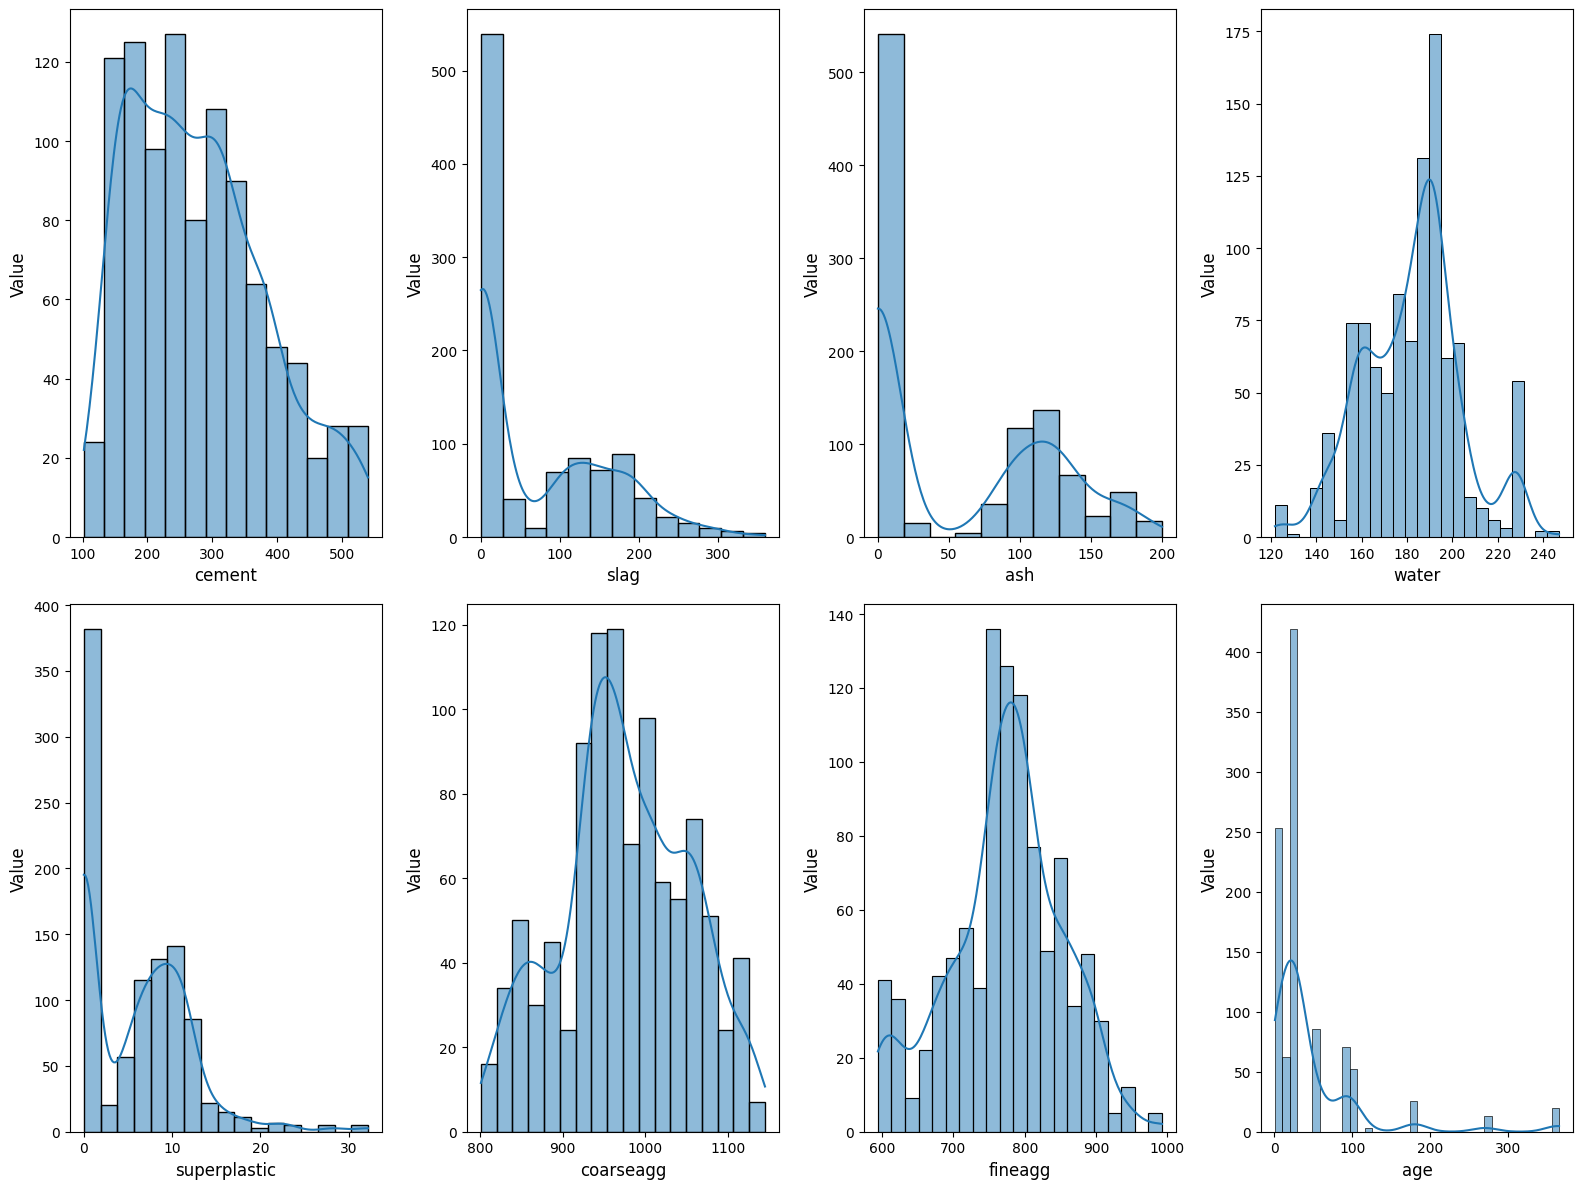

In [8]:
plt.figure(figsize=(16,12))
plotnumber=1

for column in df.drop('strength',axis=1):
  if plotnumber<=8:
    ax=plt.subplot(2,4,plotnumber)
    sns.histplot(x=df[column],kde=True)
    plt.xlabel(column,fontsize=12)
    plt.ylabel('Value',fontsize=12)
  plotnumber+=1
plt.tight_layout()

## Insights
Cement, Water, Coarseagg and Fineagg have almost even distribution of data with some gaussians.

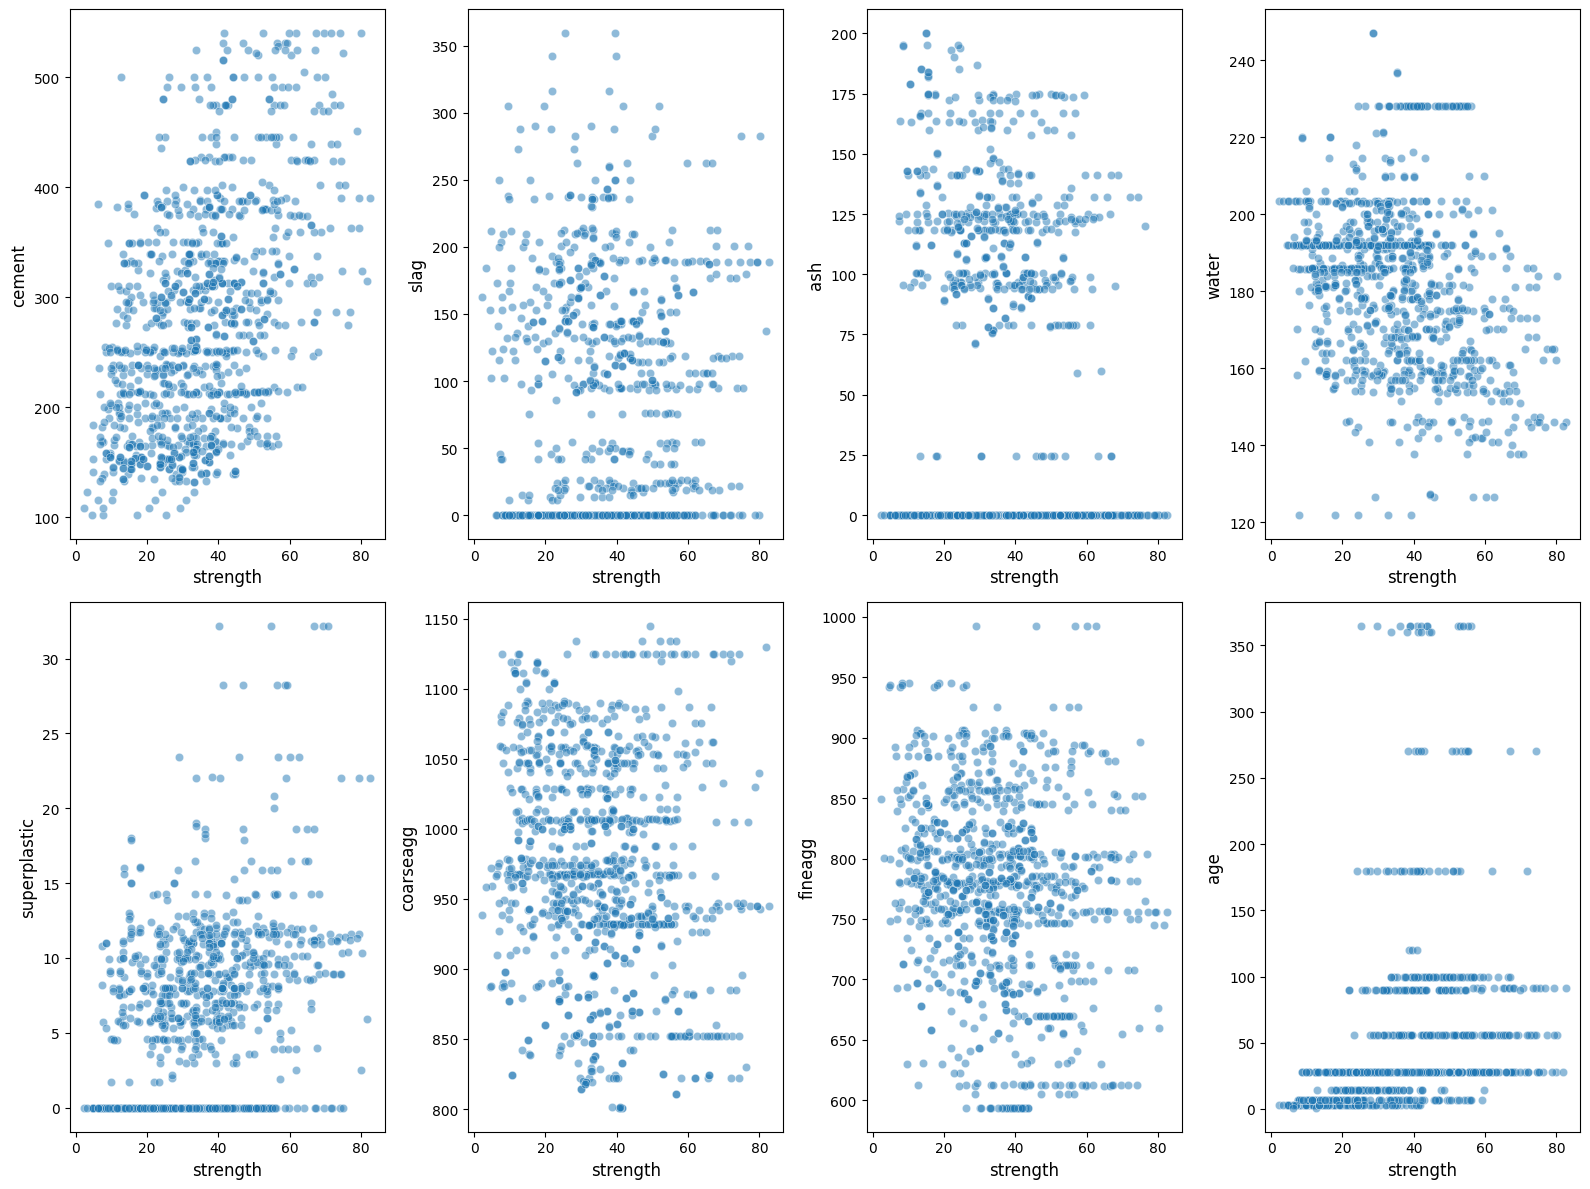

In [9]:
plt.figure(figsize=(16,12))
plotnumber=1
for column in df.drop('strength',axis=1):
  if plotnumber<=8:
    ax=plt.subplot(2,4,plotnumber)
    sns.scatterplot(x=df['strength'],y=df[column],alpha=0.5)
    plt.xlabel('strength',fontsize=12)
    plt.ylabel(column,fontsize=12)
  plotnumber+=1
plt.tight_layout()


### Insights
- Cement has a Strong Positive relationship with Strength
- Flyash and Water has a Negative relationship with Strength
- Coarseagg also more inclined towards Negative relationship with Strength.

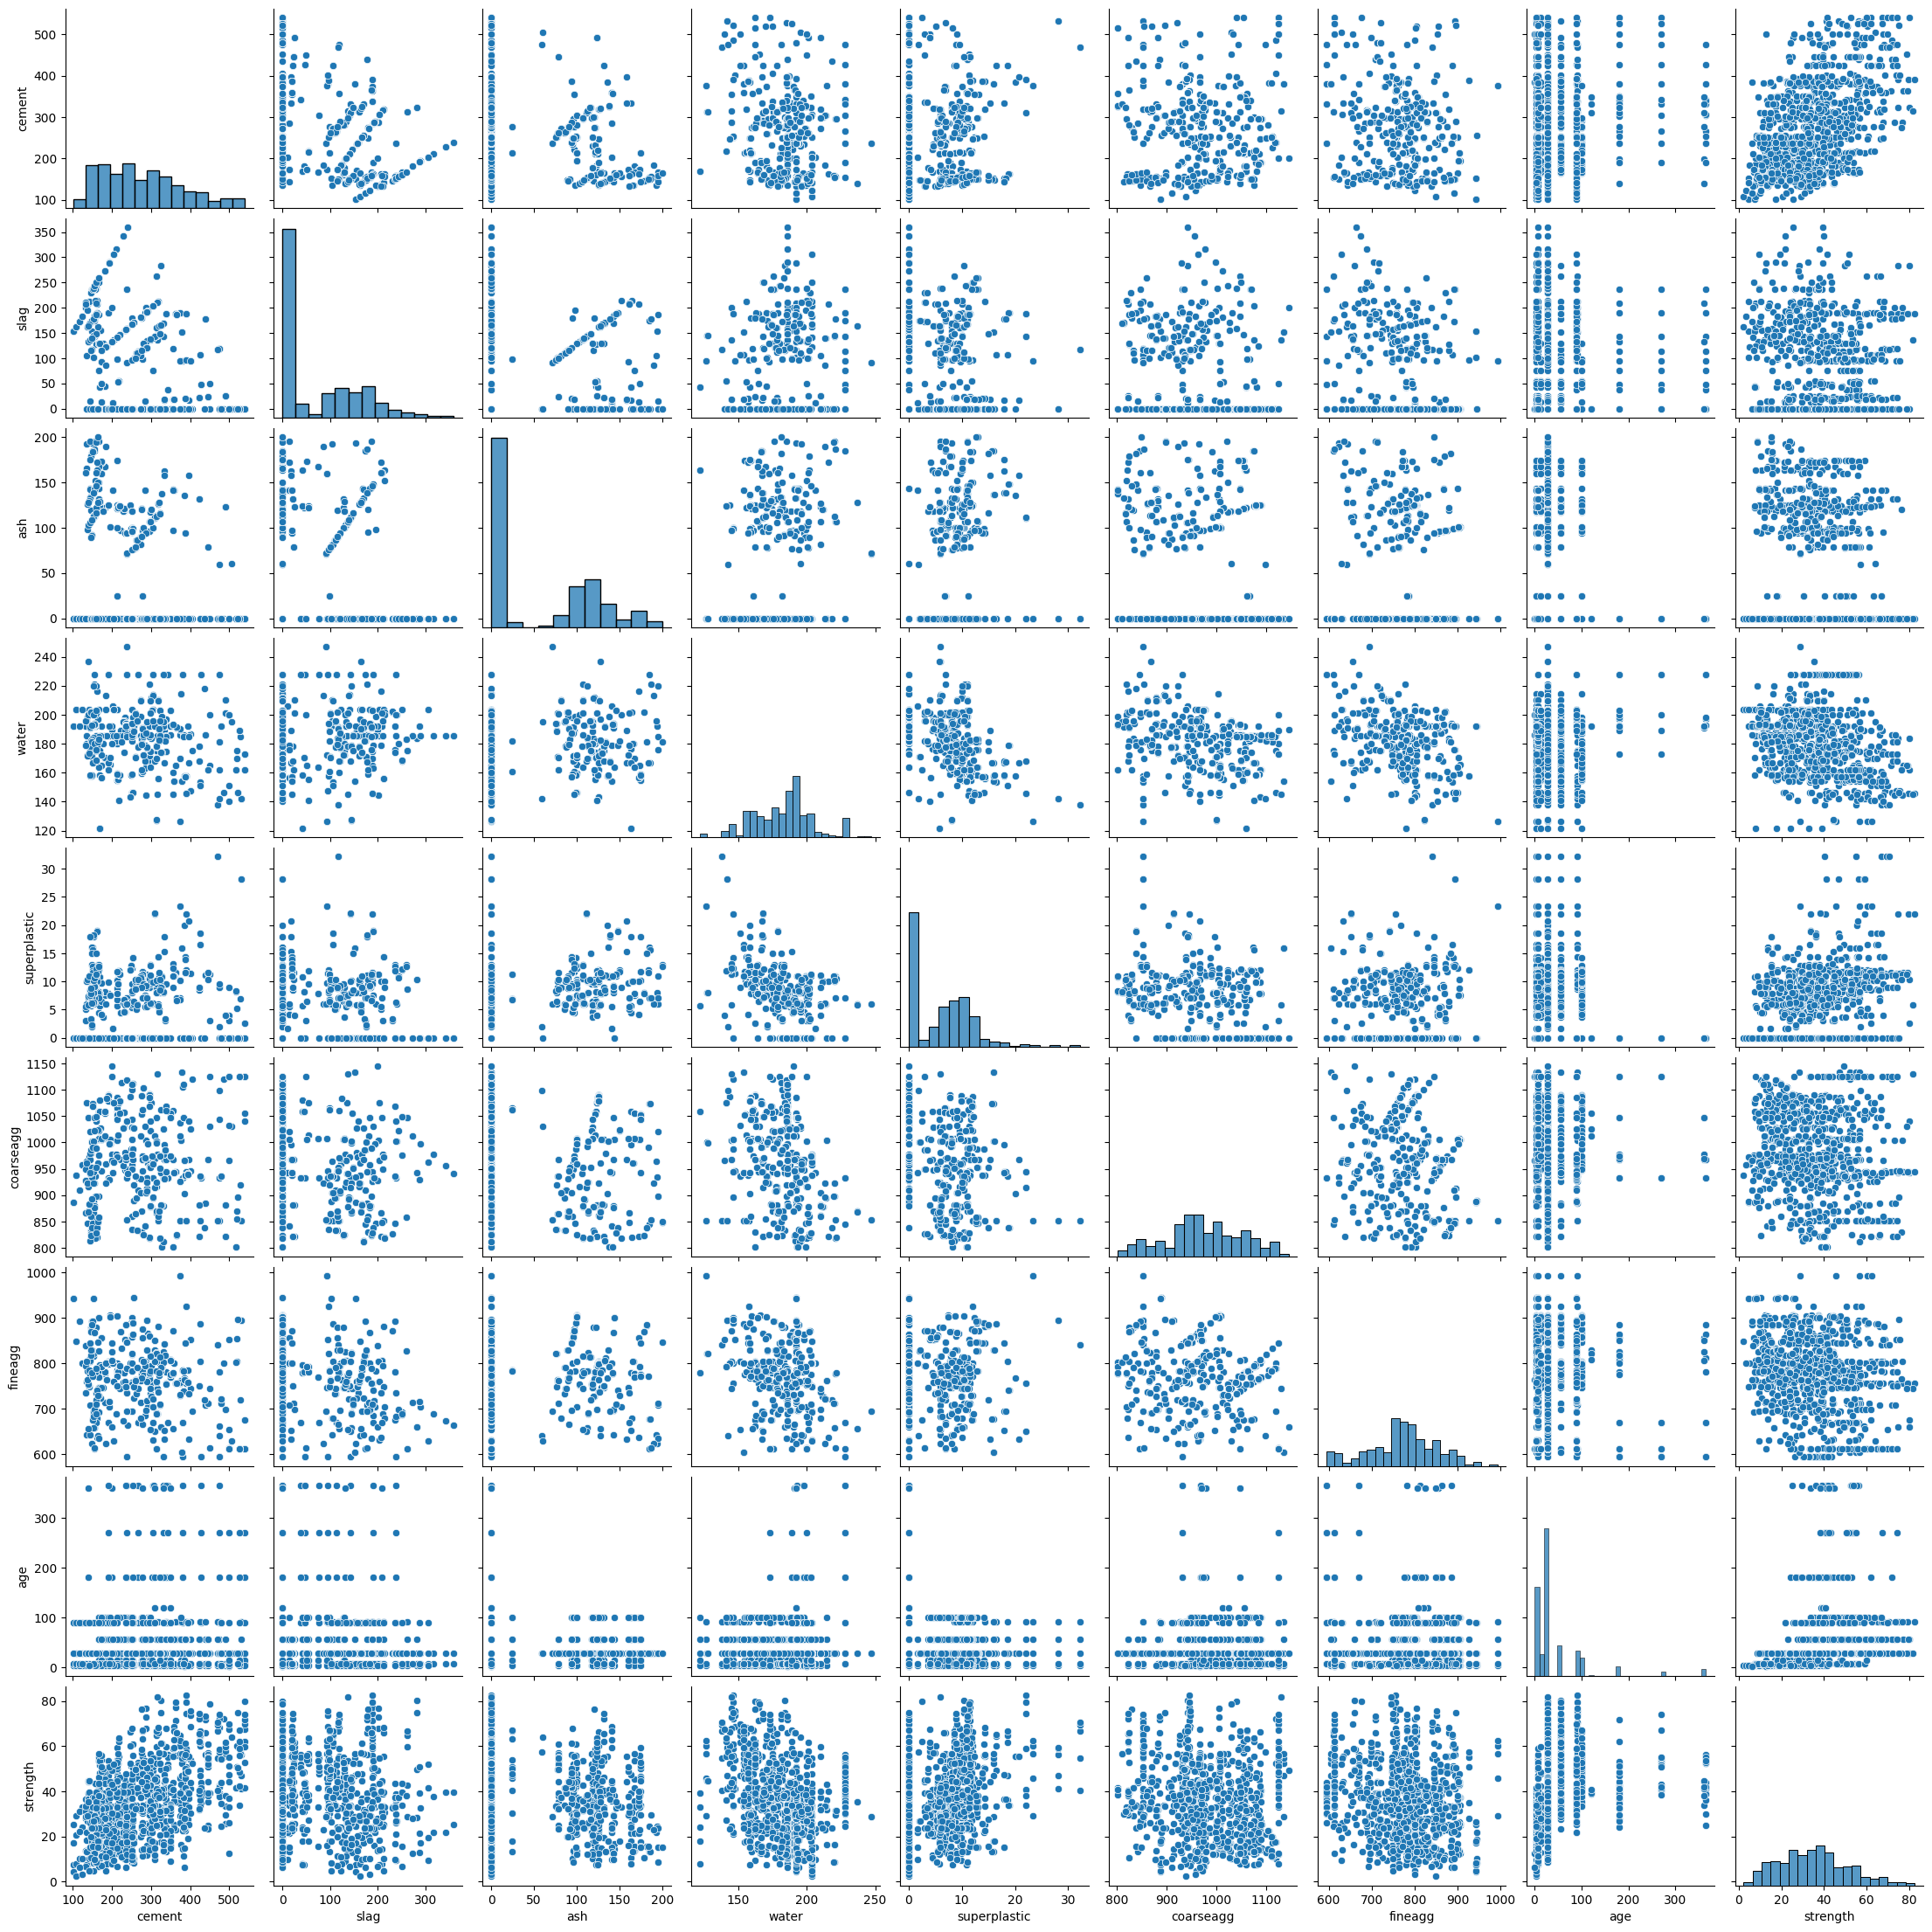

In [10]:
sns.pairplot(df)

### Insights
Here are the Relationship between the independent variables.

- Cement has a Positive relationship with Slag.
- Flyash has Positive relationship with Coarseagg and Fineagg.
- Superplastic has Negative relationship with Water and Flyash.
- Coarseagg and Fineagg has a Positive relationship between them.

### Datapreprocessing

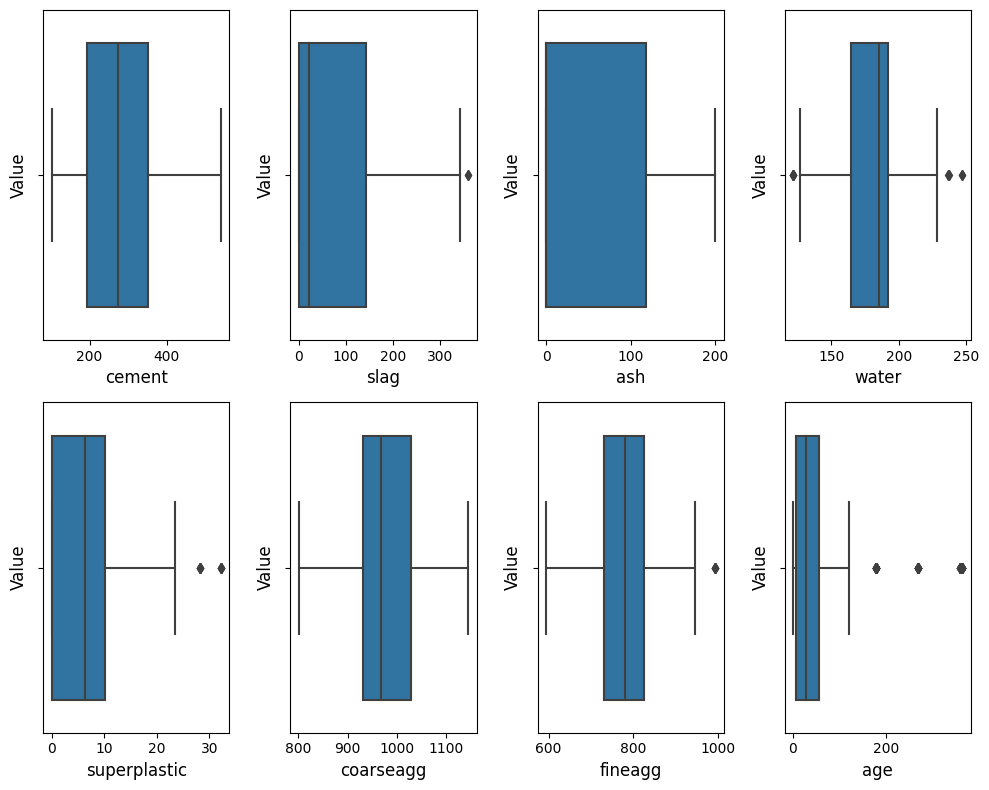

In [11]:
# To find Outliers

plt.figure(figsize=(10,8))
plotnumber=1

for column in df.drop('strength',axis=1):
  if plotnumber<=8:
    ax=plt.subplot(2,4,plotnumber)
    sns.boxplot(x=data[column])
    plt.xlabel(column,fontsize=12)
    plt.ylabel('Value',fontsize=12)
  plotnumber+=1
plt.tight_layout()

### Insights
Outliers were detected in Slag, Water, Superplastic, Fineagg and Age.

#### Slag

In [12]:
from scipy import stats

IQR=stats.iqr(df.slag,interpolation='midpoint')
Q1=df.slag.quantile(0.25)
Q3=df.slag.quantile(0.75)
min_limit=Q1-1.5*IQR
max_limit=Q3+1.5*IQR

In [13]:
df.loc[df['slag']>max_limit]

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
553,239.6,359.4,0.0,185.7,0.0,941.6,664.3,7,25.42
559,239.6,359.4,0.0,185.7,0.0,941.6,664.3,28,39.44


In [14]:
df.loc[df['slag']>max_limit,'slag']=df['slag'].median()

#### Water

In [15]:
IQR=stats.iqr(df.water,interpolation='midpoint')
Q1=df.water.quantile(0.25)
Q3=df.water.quantile(0.75)
min_limit=Q1-1.5*IQR
max_limit=Q3+1.5*IQR

In [16]:
df.loc[df['water']>max_limit]

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
862,140.0,164.0,128.0,237.0,6.0,869.0,656.0,28,35.23
873,237.0,92.0,71.0,247.0,6.0,853.0,695.0,28,28.63
936,236.9,91.7,71.5,246.9,6.0,852.9,695.4,28,28.63
1019,139.7,163.9,127.7,236.7,5.8,868.6,655.6,28,35.23


In [17]:
df.loc[df['water']>max_limit,'water']=df['water'].median()

In [18]:
df.loc[df['water']<min_limit]

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
74,375.0,93.8,0.0,126.6,23.4,852.1,992.6,3,29.00
97,375.0,93.8,0.0,126.6,23.4,852.1,992.6,7,45.70
120,375.0,93.8,0.0,126.6,23.4,852.1,992.6,28,56.70
143,375.0,93.8,0.0,126.6,23.4,852.1,992.6,56,60.20
166,375.0,93.8,0.0,126.6,23.4,852.1,992.6,91,62.50
224,168.0,42.1,163.8,121.8,5.7,1058.7,780.1,3,7.75
225,168.0,42.1,163.8,121.8,5.7,1058.7,780.1,14,17.82
226,168.0,42.1,163.8,121.8,5.7,1058.7,780.1,28,24.24
227,168.0,42.1,163.8,121.8,5.7,1058.7,780.1,56,32.85
228,168.0,42.1,163.8,121.8,5.7,1058.7,780.1,100,39.23


In [19]:
df.loc[df['water']<min_limit,'water']=df['water'].median()

#### Superplastic

In [20]:
IQR=stats.iqr(df.superplastic,interpolation='midpoint')
Q1=df.superplastic.quantile(0.25)
Q3=df.superplastic.quantile(0.75)
min_limit=Q1-1.5*IQR
max_limit=Q3+1.5*IQR

In [21]:
df.loc[df['superplastic']>max_limit]

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
76,469.0,117.2,0.0,137.8,32.2,852.1,840.5,3,40.2
79,531.3,0.0,0.0,141.8,28.2,852.1,893.7,3,41.3
99,469.0,117.2,0.0,137.8,32.2,852.1,840.5,7,54.9
102,531.3,0.0,0.0,141.8,28.2,852.1,893.7,7,46.9
122,469.0,117.2,0.0,137.8,32.2,852.1,840.5,28,66.9
125,531.3,0.0,0.0,141.8,28.2,852.1,893.7,28,56.4
145,469.0,117.2,0.0,137.8,32.2,852.1,840.5,56,69.3
148,531.3,0.0,0.0,141.8,28.2,852.1,893.7,56,58.8
168,469.0,117.2,0.0,137.8,32.2,852.1,840.5,91,70.7
171,531.3,0.0,0.0,141.8,28.2,852.1,893.7,91,59.2


In [22]:
df.loc[df['superplastic']>max_limit,'superplastic']=df['superplastic'].median()

In [23]:
df.loc[df['superplastic']<min_limit]

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength


### Fineagg

In [24]:
IQR=stats.iqr(df.fineagg,interpolation='midpoint')
Q1=df.fineagg.quantile(0.25)
Q3=df.fineagg.quantile(0.75)
min_limit=Q1-1.5*IQR
max_limit=Q3+1.5*IQR

In [25]:
df.loc[df['fineagg']>max_limit]

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
74,375.0,93.8,0.0,185.7,23.4,852.1,992.6,3,29.0
97,375.0,93.8,0.0,185.7,23.4,852.1,992.6,7,45.7
120,375.0,93.8,0.0,185.7,23.4,852.1,992.6,28,56.7
143,375.0,93.8,0.0,185.7,23.4,852.1,992.6,56,60.2
166,375.0,93.8,0.0,185.7,23.4,852.1,992.6,91,62.5


In [26]:
df.loc[df['fineagg']>max_limit,'fineagg']=df['fineagg'].mean()

In [27]:
df.loc[df['fineagg']<min_limit]

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength


### Age

In [28]:
IQR=stats.iqr(df.age,interpolation='midpoint')
Q1=df.age.quantile(0.25)
Q3=df.age.quantile(0.75)
min_limit=Q1-1.5*IQR
max_limit=Q3+1.5*IQR

In [29]:
df.loc[df['age']>max_limit]

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30
6,380.0,95.0,0.0,228.0,0.0,932.0,594.0,365,43.70
12,427.5,47.5,0.0,228.0,0.0,932.0,594.0,270,43.01
17,342.0,38.0,0.0,228.0,0.0,932.0,670.0,365,56.14
19,475.0,0.0,0.0,228.0,0.0,932.0,594.0,180,42.62
20,427.5,47.5,0.0,228.0,0.0,932.0,594.0,180,41.84
23,139.6,209.4,0.0,192.0,0.0,1047.0,806.9,180,44.21
24,380.0,0.0,0.0,228.0,0.0,932.0,670.0,365,52.52


In [33]:
len(df.loc[df['age']>max_limit])/len(df)*100

5.870646766169154

In [34]:
df.loc[df['age']>max_limit,'age']=df['age'].median()

In [35]:
df.loc[df['age']<min_limit]

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength


###Scaling

In [37]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
df.iloc[:,:-1]=scaler.fit_transform(df.iloc[:,:-1])

In [38]:
df

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,2.506116,-0.837677,-0.865375,-1.020805,-0.610496,0.846302,-1.213425,-0.148903,79.99
1,2.506116,-0.837677,-0.865375,-1.020805,-0.610496,1.039748,-1.213425,-0.148903,61.89
2,0.516516,0.834906,-0.865375,2.262168,-1.073915,-0.546508,-2.254292,-0.148903,40.27
3,0.516516,0.834906,-0.865375,2.262168,-1.073915,-0.546508,-2.254292,-0.148903,41.05
4,-0.767375,0.716358,-0.865375,0.471455,-1.073915,0.051885,0.684254,-0.148903,44.30
...,...,...,...,...,...,...,...,...,...
1025,-0.021395,0.523864,0.541693,-0.145346,0.575857,-1.344795,-0.041815,-0.148903,44.28
1026,0.417755,-0.837677,0.935921,0.670423,0.853909,-2.017987,0.530662,-0.148903,31.18
1027,-1.247756,0.798520,0.826846,0.506275,0.056828,-1.057205,0.106699,-0.148903,23.70
1028,-1.146118,1.353700,-0.865375,-0.344314,1.020740,0.196324,0.219672,-0.148903,32.77


## Feature Engineering

<Axes: >

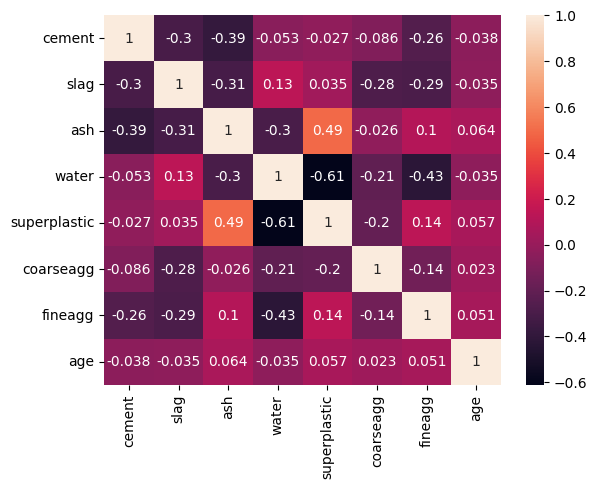

In [39]:
sns.heatmap(df.drop('strength',axis=1).corr(),annot=True)

### Insights
There is no correlation between the independent variables.

##Model Building

In [40]:
x=df.drop('strength',axis=1)
y=df.strength

In [41]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.30,random_state=3)

### Linear Regression

In [42]:
from sklearn.linear_model import LinearRegression
lr_model=LinearRegression()
lr_model.fit(x_train,y_train)

LinearRegression()

In [43]:
lr_pred=lr_model.predict(x_test)

MAE: 6.962331408021042
MSE: 86.5786220590157
RMSE: 9.304763406933876
r2_score: 0.6894051868415125
adj_r2_score: 0.31907521761332674


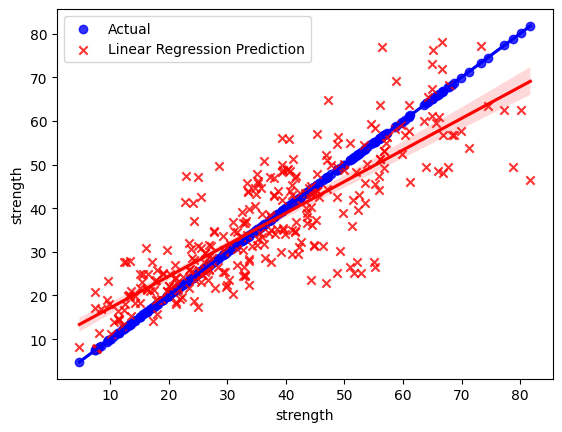

In [45]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
print(f'MAE: {mean_absolute_error(y_test,lr_pred)}')
print(f'MSE: {mean_squared_error(y_test,lr_pred)}')
print(f'RMSE: {mean_squared_error(y_test,lr_pred)**0.5}')
print(f'r2_score: {r2_score(y_test,lr_pred)}')
print(f'adj_r2_score: {(1-0.6894051868415125)*(302-1)/(302-8-1)}')

sns.regplot(x=y_test, y=y_test, marker='o', color='blue',label='Actual')
sns.regplot(x=y_test, y=lr_pred, marker='x', color='red',label='Linear Regression Prediction')
plt.legend(loc='best')

#### SVM

In [46]:
from sklearn.svm import SVR
svm= SVR()
svm.fit(x_train,y_train)

SVR()

In [47]:
svr_pred= svm.predict(x_test)

MAE: 7.366318788497063
MSE: 93.07206468989877
RMSE: 9.647386417569205
r2_score: 0.6661104109172696
adj_r2_score: 0.3430060283750916


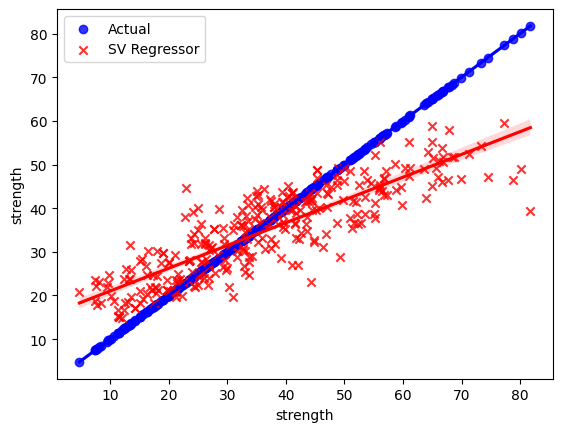

In [50]:
print(f'MAE: {mean_absolute_error(y_test,svr_pred)}')
print(f'MSE: {mean_squared_error(y_test,svr_pred)}')
print(f'RMSE: {mean_squared_error(y_test,svr_pred)**0.5}')
print(f'r2_score: {r2_score(y_test,svr_pred)}')
print(f'adj_r2_score: {(1-0.6661104109172696)*(302-1)/(302-8-1)}')

sns.regplot(x=y_test, y=y_test, marker='o', color='blue',label='Actual')
sns.regplot(x=y_test, y=svr_pred, marker='x', color='red',label='SV Regressor')
plt.legend(loc='best')

### Random Forest Regressor

In [51]:
from sklearn.ensemble import RandomForestRegressor
rf_model= RandomForestRegressor()
rf_model.fit(x_train,y_train)

RandomForestRegressor()

In [52]:
rf_pred= rf_model.predict(x_test)

MAE: 3.8019951319247367
MSE: 28.35348878491828
RMSE: 5.32479941264629
r2_score: 0.8982838217783126
adj_r2_score: 0.10449341175675057


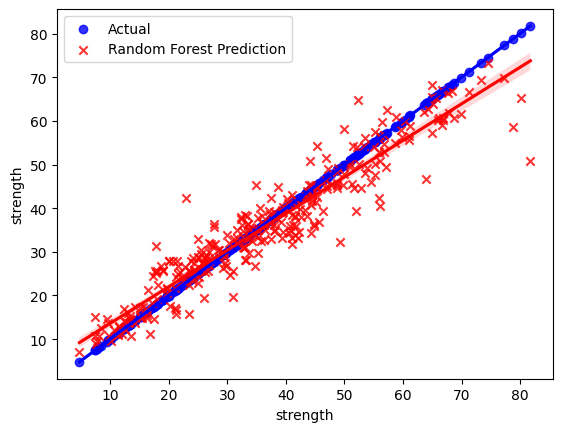

In [54]:
print(f'MAE: {mean_absolute_error(y_test,rf_pred)}')
print(f'MSE: {mean_squared_error(y_test,rf_pred)}')
print(f'RMSE: {mean_squared_error(y_test,rf_pred)**0.5}')
print(f'r2_score: {r2_score(y_test,rf_pred)}')
print(f'adj_r2_score: {(1-0.8982838217783126)*(302-1)/(302-8-1)}')

sns.regplot(x=y_test, y=y_test, marker='o', color='blue',label='Actual')
sns.regplot(x=y_test, y=rf_pred, marker='x', color='red',label='Random Forest Prediction')
plt.legend(loc='best')

### XG Boost

In [55]:
from xgboost import XGBRegressor
xg_model= XGBRegressor()
xg_model.fit(x_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [56]:
xg_pred=xg_model.predict(x_test)

MAE: 3.4035239776712376
MSE: 24.80563674199598
RMSE: 4.9805257495565645
r2_score: 0.9110114953792423
adj_r2_score: 0.0914182248834405


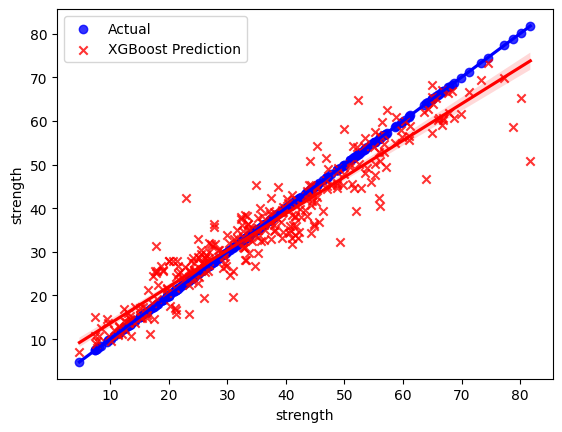

In [58]:
print(f'MAE: {mean_absolute_error(y_test,xg_pred)}')
print(f'MSE: {mean_squared_error(y_test,xg_pred)}')
print(f'RMSE: {mean_squared_error(y_test,xg_pred)**0.5}')
print(f'r2_score: {r2_score(y_test,xg_pred)}')
print(f'adj_r2_score: {(1-0.9110114953792423)*(302-1)/(302-8-1)}')

sns.regplot(x=y_test, y=y_test, marker='o', color='blue',label='Actual')
sns.regplot(x=y_test, y=rf_pred, marker='x', color='red',label='XGBoost Prediction')
plt.legend(loc='best')

### XG Boost - Hypertuning

In [59]:
from sklearn.model_selection import RandomizedSearchCV
param_grid= {'max_depth': [2,3,4,6,12,20,25,30,35,40,60,100],
             'learning_rate': [0.1,0.3,0.5,0.8,0.025,1,0.006,0.04,1.2,0.0002,1.4,1.6],
             'gamma': [0.1,0.3,0.7,0.9,1.2,1.8,0.5,0.2,0.8,2,2.4,1.5],
             'reg_alpha': [0,0.1,0.2,0.4,0.8,1.6,3.2,6.4,12.8,25.6,51.2,102.4],
             'reg_lamda': [0,0.1,0.2,0.4,0.8,1.6,3.2,6.4,12.8,25.6,51.2,102.4],
             'n_estimators': [30,50,80,100,130,120,110,90,140,200,160,250],
             'min_child_weight': [2,4,5,6,7,8,9,15,11,16,20,33]}

In [69]:
xgb_grid=RandomizedSearchCV(estimator=xg_model,scoring='r2',param_distributions=param_grid,n_iter=200,verbose=2,n_jobs=-1,cv=12,random_state=10)
xgb_grid.fit(x_train,y_train)
xgb_best_params=xgb_grid.best_params_
print(f'xgb_best_parameter: {xgb_best_params}')

Fitting 12 folds for each of 200 candidates, totalling 2400 fits
[05:27:07] WARNING: ../src/learner.cc:767: 
Parameters: { "reg_lamda" } are not used.

xgb_best_parameter: {'reg_lamda': 25.6, 'reg_alpha': 12.8, 'n_estimators': 140, 'min_child_weight': 2, 'max_depth': 60, 'learning_rate': 0.1, 'gamma': 0.2}


In [98]:
xg_model= XGBRegressor(reg_lamda=3.2, reg_alpha= 12.8, n_estimators= 180, min_child_weight= 5, max_depth= 60, learning_rate= 0.1, gamma= 0.2)
# From best parameters changed n_estimator and min_child_weight for better r2 score
xg_model.fit(x_train,y_train)

[05:33:41] WARNING: ../src/learner.cc:767: 
Parameters: { "reg_lamda" } are not used.



XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=0.2, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=60, max_leaves=None,
             min_child_weight=5, missing=nan, monotone_constraints=None,
             n_estimators=180, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [99]:
xg_pred1=xg_model.predict(x_test)

MAE: 3.3092925934444195
MSE: 24.13039294340083
RMSE: 4.912269632603735
r2_score: 0.9134338857623802
adj_r2_score: 0.08892969414854461


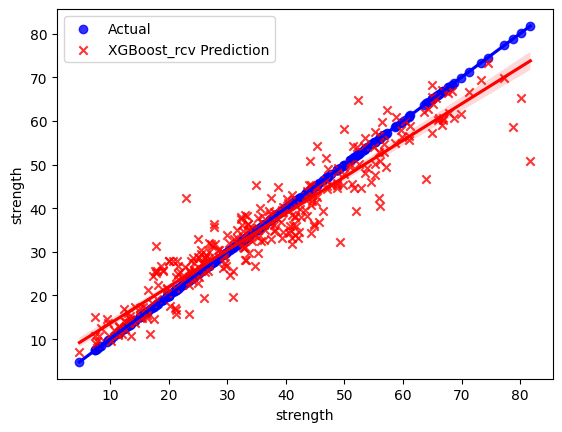

In [104]:
print(f'MAE: {mean_absolute_error(y_test,xg_pred1)}')
print(f'MSE: {mean_squared_error(y_test,xg_pred1)}')
print(f'RMSE: {mean_squared_error(y_test,xg_pred1)**0.5}')
print(f'r2_score: {r2_score(y_test,xg_pred1)}')
print(f'adj_r2_score: {(1-0.9134338857623802)*(302-1)/(302-8-1)}')

sns.regplot(x=y_test, y=y_test, marker='o', color='blue',label='Actual')
sns.regplot(x=y_test, y=rf_pred, marker='x', color='red',label='XGBoost_rcv Prediction')
plt.legend(loc='best')

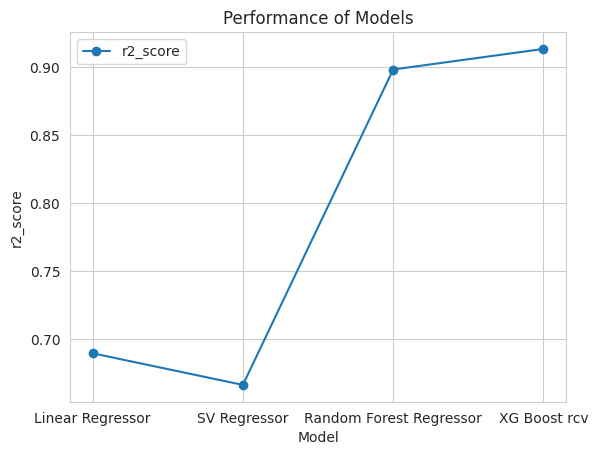

In [107]:
# Line chart to Compare Model performance
models = ["Linear Regressor", "SV Regressor", "Random Forest Regressor", "XG Boost rcv"]
r2_score = [0.6894051868415125, 0.6661104109172696, 0.8982838217783126, 0.9134338857623802]

sns.set_style('whitegrid')
plt.plot(models, r2_score, marker="o",label='r2_score')
plt.xlabel("Model")
plt.ylabel("r2_score")
plt.title("Performance of Models")
plt.legend(loc='best')
plt.show()

##Conclusion
An r2_score of 0.9134338857623802 means that the XG Boost explains 91.34% of the variation in the concrete strength data. It suggests that the model is likely to be accurate in predicting concrete strength for new data.

Overall, the XG Boost model is a good choice for concrete strength prediction compared to other models in graph. It has low error rates and a high r2_score, which suggests that it is able to accurately predict concrete strength for new data.